# Insurance Policy Claims:

© Explore Data Science Academy


# Introduction


# Problem Statement


# Hypothesis


<a id="cont"></a>

# Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing </a>

<a href=#four>4. Exploratory Data Analysis(EDA)</a>

<a href=#five>5. Modelling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>


<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>


In [1]:
# Imports
# data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# wordcloud
from wordcloud import WordCloud

# warning library
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>

## 2. Loading Data

<a href=#cont>Back to Table of Contents</a>


In [84]:
# Load the Data from Explore public data repository
url = "https://raw.githubusercontent.com/Explore-AI/Public-Data/master/insurance_claims.csv"
insurance_data = pd.read_csv(url)

In [3]:
# Initial Data Exploration
# Display the first few rows of the dataset
print(insurance_data.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [4]:
# Summary statistics
print(insurance_data.describe(include='all'))

        months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       2006-01-01   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000    

### Dataset Description

The dataset pertains to insurance claims and encapsulates a wide array of information, spanning from customer details to specific claim-related data. The dataset provides a comprehensive view of the factors and variables that might influence or be indicative of an insurance claim, especially in the context of __.

1. **Customer Details**: Essential demographics of the insured party such as their age, tenure as a customer, and geographical information.
2. **Policy Information**: Key details about the insurance policy, including the policy number, bind date, deductibles, and annual premiums. This section also touches upon the umbrella limit associated with the policy.
3. **Claim Details**: This segment offers a detailed view of the claim, including the date of the incident, type of incident, severity, and the total claim amount. It also contains information about the authorities contacted in the aftermath of the incident.
4. **Vehicle Information**: Data related to the insured vehicle, including its make, model, and the year of manufacture.
5. **Fraud Indicator**: A binary indicator signifying whether a particular claim was fraudulent.

The dataset presents a holistic view, making it an invaluable asset for any analytical endeavor aiming to understand, predict, or mitigate insurance claim returns and losses.


<a id="three"></a>

## 3. Data Preprocessing

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Handling Missing Values

After identifying columns with missing values, we will take the following steps:

1. **Imputation**: For columns where missing values can be imputed, we'll use appropriate strategies like mean, median, or mode imputation, depending on the column's nature.
2. **Dropping Values**: For columns where imputation might not be appropriate, or if the missing values are significant, we may opt to drop those values or the entire column.
3. **Data Integrity Checks**: Ensure that the data, post-imputation, remains consistent and accurate.


### Other Preprocessing Steps

We'll undertake several preprocessing steps to prepare our data for modeling:

1. **Encoding Categorical Variables**: Convert categorical variables into a format suitable for machine learning models.
2. **Handling Outliers**: Identify and treat outliers in the dataset.
3. **Feature Scaling**: Ensure that features are on a similar scale.
4. **Feature Engineering**: Create new features or transform existing ones to improve model performance.


In [5]:
# Check for missing values
missing_values = insurance_data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0


<a id="four"></a>

## 4. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Data Visualization


From the distribution of age, we observe that the majority of policyholders fall within the age range of 33 to 43 This could indicate that people in that age group afford the policy or understand the need for it.


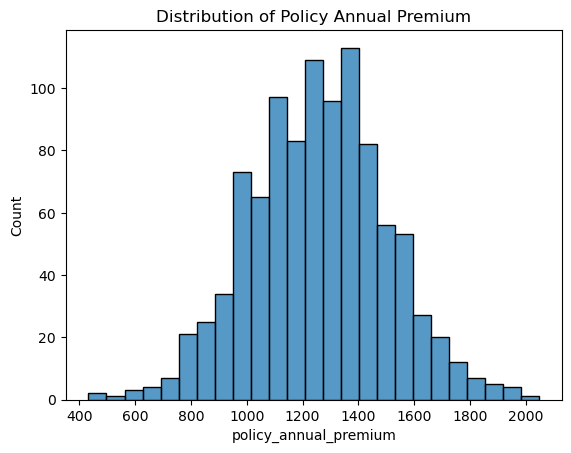

In [6]:
# Distribution of Policy Annual Premium
sns.histplot(insurance_data['policy_annual_premium'])
plt.title('Distribution of Policy Annual Premium')
plt.show()

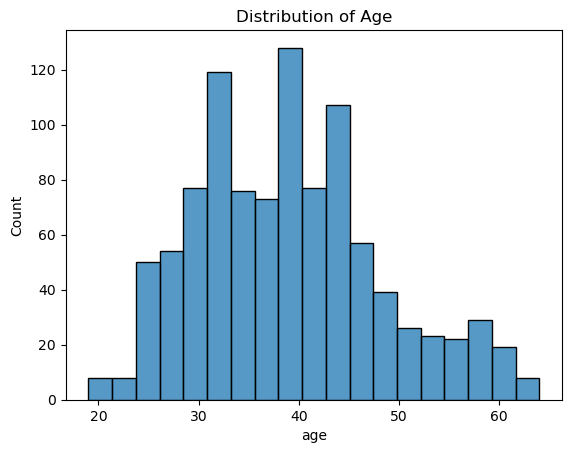

In [7]:
# Distribution of Age
sns.histplot(insurance_data['age'])
plt.title('Distribution of Age')
plt.show()

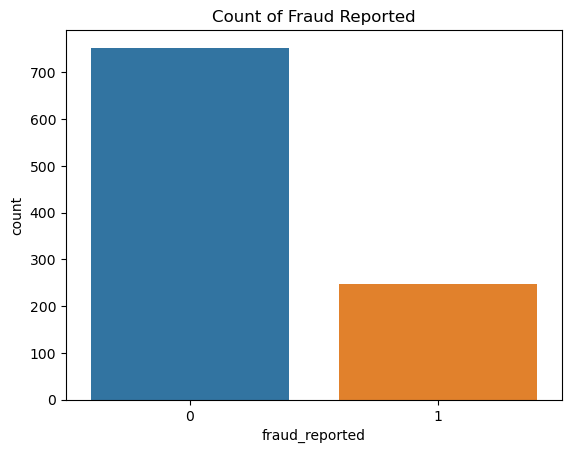

In [83]:
# Count of Fraud Reported
sns.countplot(x='fraud_reported', data=insurance_data)
plt.title('Count of Fraud Reported')
plt.show()

In [9]:
# Further Analysis
# Average claim amount by fraud reported
avg_claim_by_fraud = insurance_data.groupby('fraud_reported')['total_claim_amount'].mean()
print("Average claim amount by fraud reported:\n", avg_claim_by_fraud)

Average claim amount by fraud reported:
 fraud_reported
N    50288.605578
Y    60302.105263
Name: total_claim_amount, dtype: float64


### Handling Missing Values

In our given dataset, some columns have missing values or placeholders that need addressing:

1. **Dropping Columns**: Columns that contain only missing values or don't provide valuable information can be dropped. The column `_c39` is one such column, which only contains missing values and hence will be removed.
2. **Replacing Placeholders**: The `police_report_available` column contains placeholders ('?') which we will replace with 'UNKNOWN' for clarity.
3. **Consistent Handling**: Ensure that if '?' is used as a placeholder in other columns, we apply consistent handling across the dataset.


### Unknowns and other special characters

In [12]:
# Replace '?' with 'UNKNOWN' in the 'police_report_available' column
insurance_data['police_report_available'] = insurance_data['police_report_available'].replace('?', 'UNKNOWN')
print(insurance_data['police_report_available'].value_counts())

police_report_available
UNKNOWN    343
NO         343
YES        314
Name: count, dtype: int64


In [11]:
insurance_data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [12]:
# Calculate Q1, Q3, and IQR
Q1 = insurance_data['total_claim_amount'].quantile(0.25)
Q3 = insurance_data['total_claim_amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)

28780.0
41812.5
70592.5


In [13]:
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
# Identify anomalies
anomalies = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 1


In [15]:
# Extract the anomalous record
anomalous_record = insurance_data[(insurance_data['total_claim_amount'] < lower_bound) | (insurance_data['total_claim_amount'] > upper_bound)]
print(anomalous_record.transpose())

                                                  11
months_as_customer                               447
age                                               61
policy_number                                 214618
policy_bind_date                          1999-05-29
policy_state                                      OH
policy_csl                                   100/300
policy_deductable                               2000
policy_annual_premium                        1137.16
umbrella_limit                                     0
insured_zip                                   615561
insured_sex                                   FEMALE
insured_education_level                  High School
insured_occupation                   exec-managerial
insured_hobbies                            skydiving
insured_relationship                  other-relative
capital-gains                                      0
capital-loss                                  -51000
incident_date                             2015

### Further Exporation


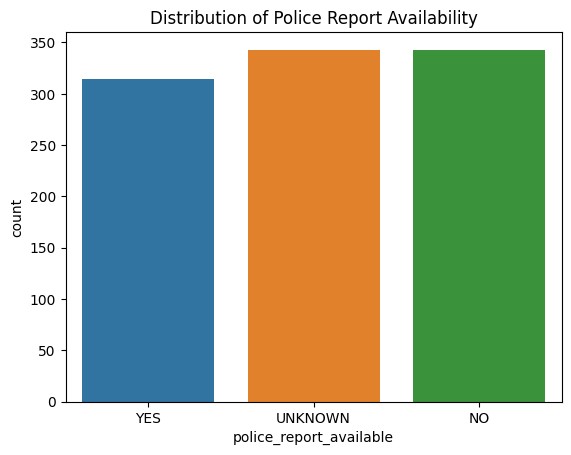

In [18]:
# Distribution Analysis
sns.countplot(x='police_report_available', data=insurance_data)
plt.title('Distribution of Police Report Availability')
plt.show()

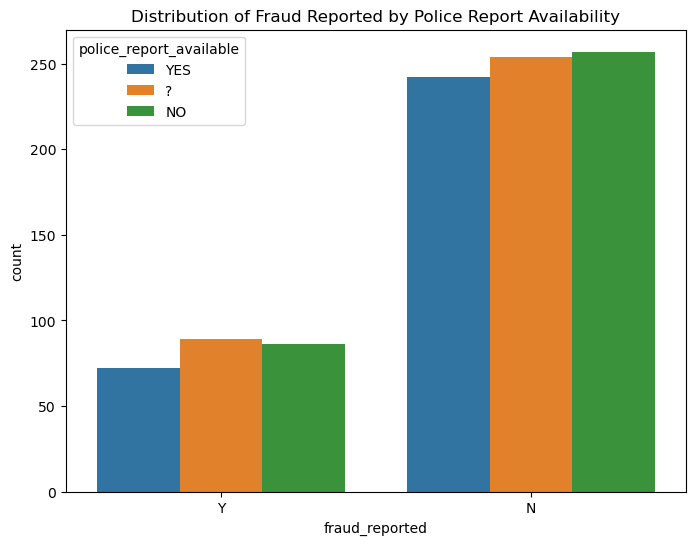

In [20]:
# Impact on Fraud Reporting
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', hue='police_report_available', data=insurance_data)
plt.title('Distribution of Fraud Reported by Police Report Availability')
plt.show()

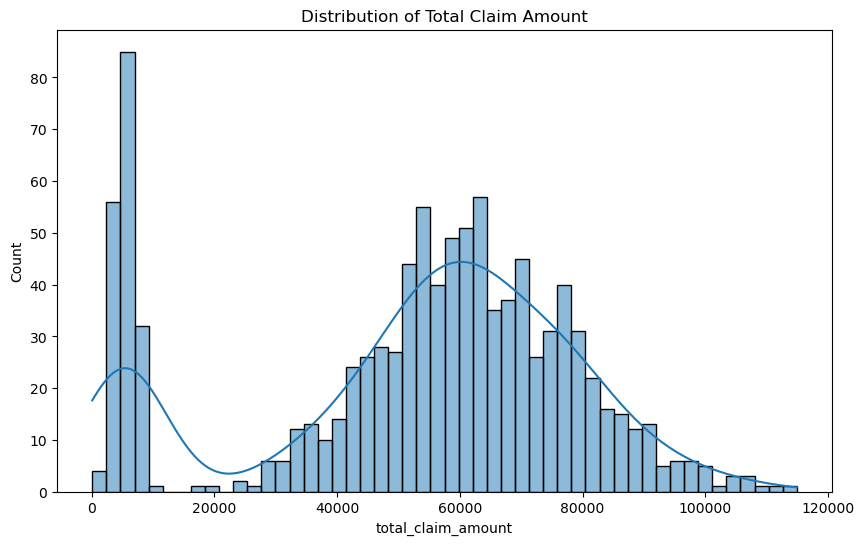

In [21]:
# Total Claim Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['total_claim_amount'], bins=50, kde=True)
plt.title('Distribution of Total Claim Amount')
plt.show()

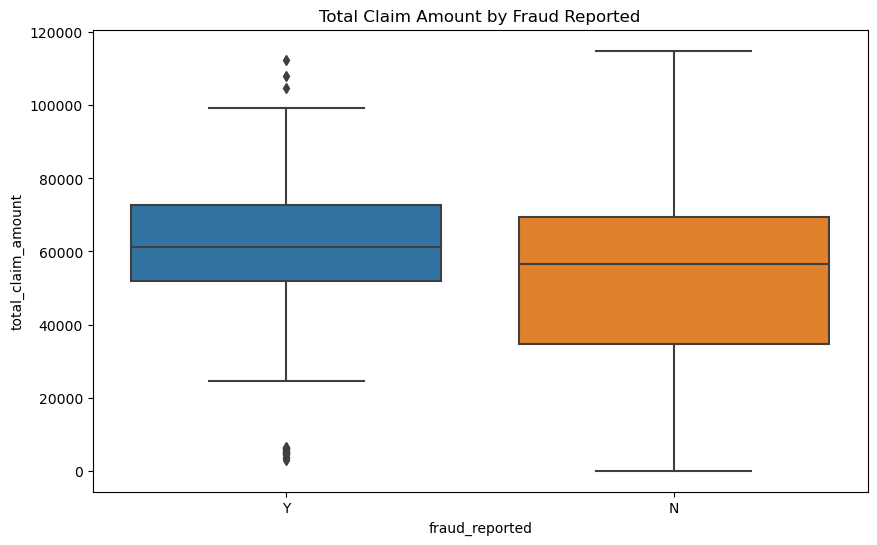

In [22]:
# Fraud Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Fraud Reported')
plt.show()

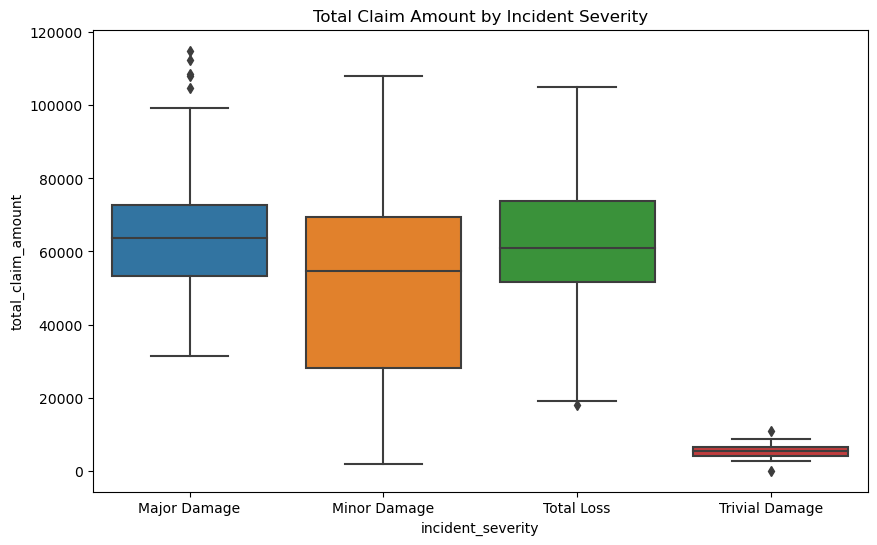

In [23]:
# Incident Severity Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_severity', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Severity')
plt.show()

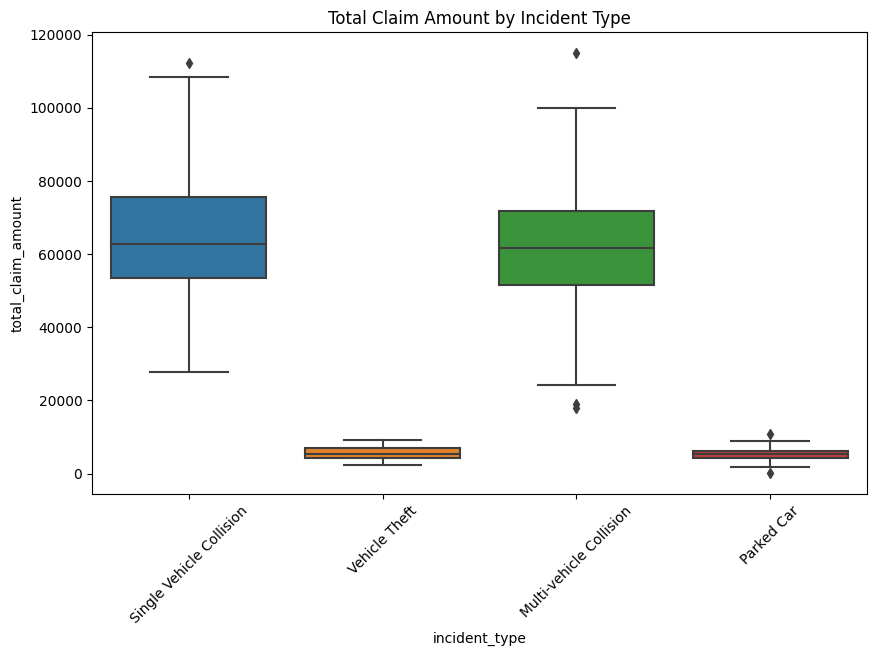

In [27]:
# Incident Type Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_type', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident Type')
plt.xticks(rotation=45)
plt.show()

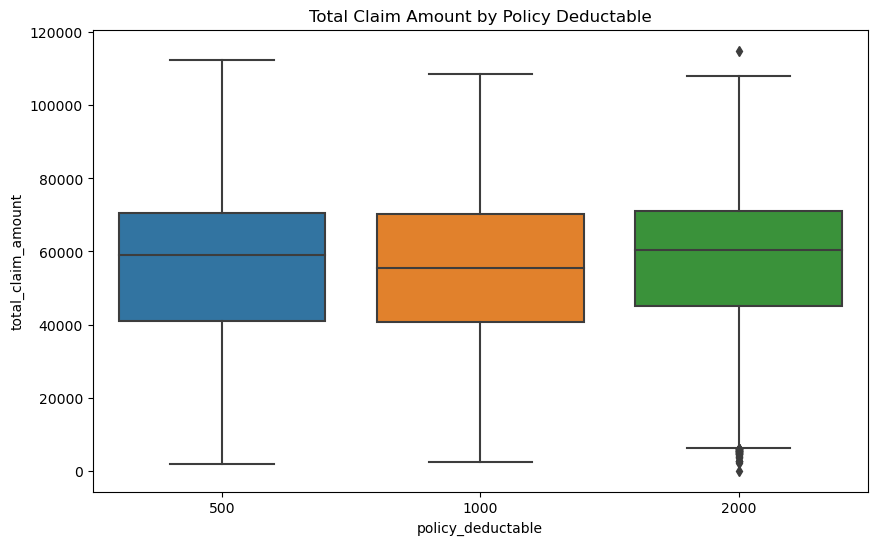

In [24]:
# Policy Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductable')
plt.show()

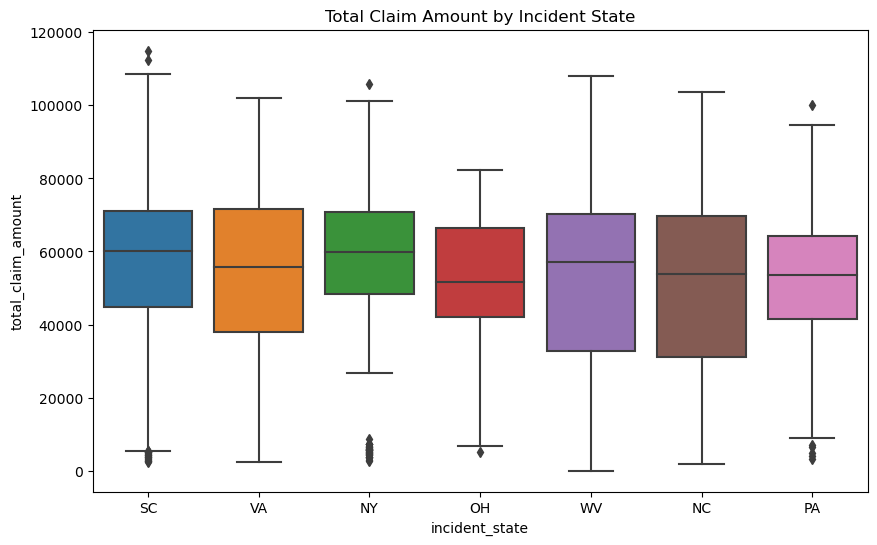

In [25]:
# Location Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Incident State')
plt.show()

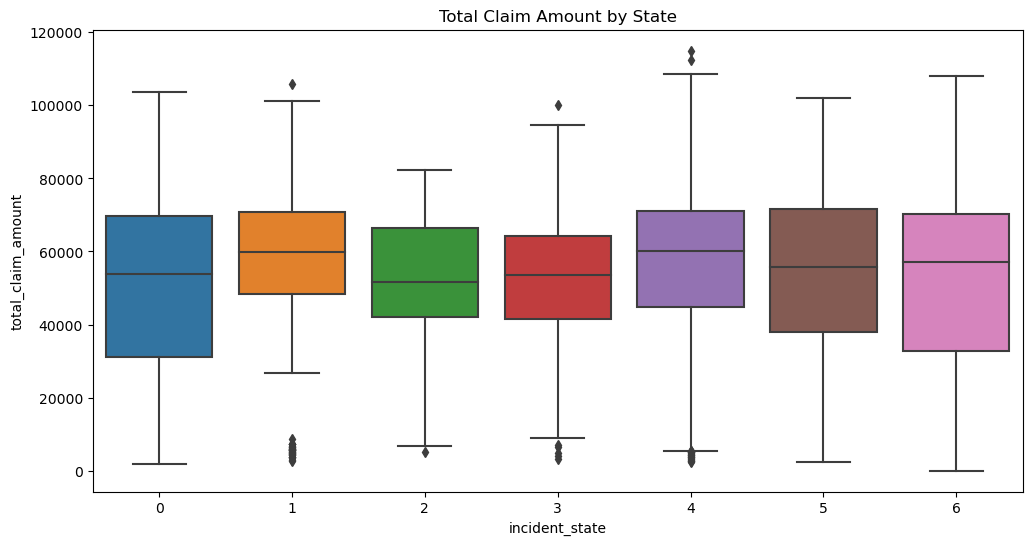

In [78]:
# Distribution of Claim Amounts by State and City
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_state', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by State')
plt.show()

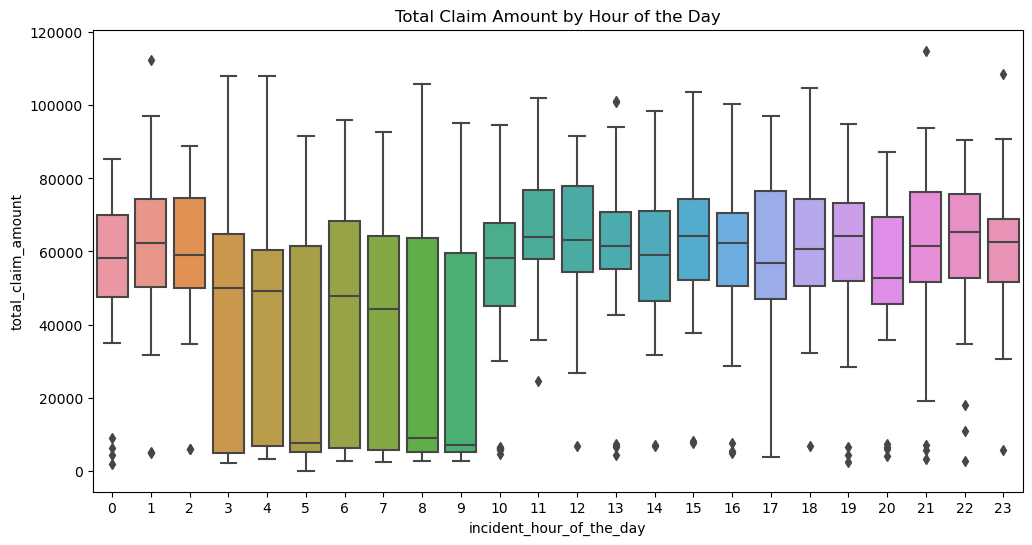

In [79]:
# Claim Amounts by Time of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='incident_hour_of_the_day', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Hour of the Day')
plt.show()

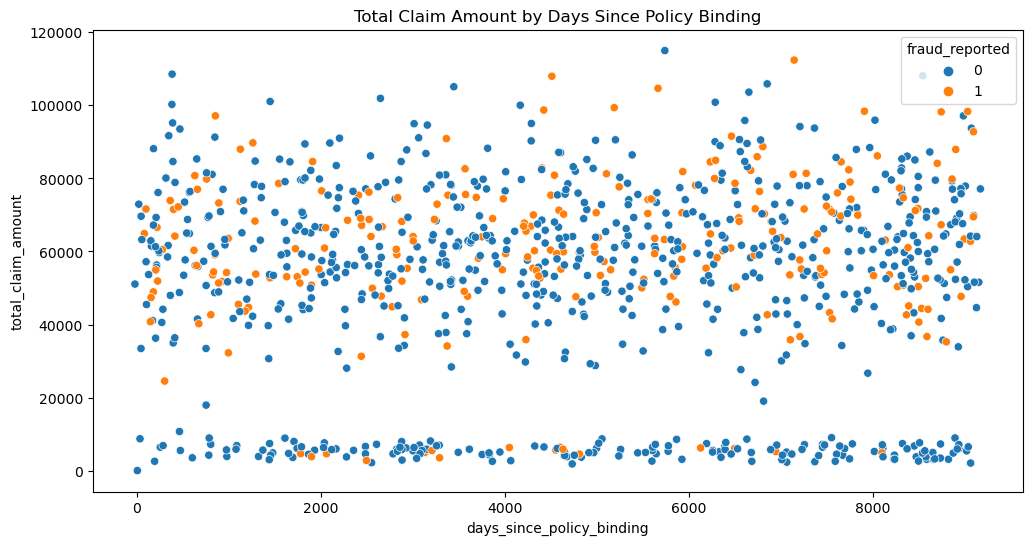

In [80]:
# Claim Amounts by Duration Since Policy Binding
plt.figure(figsize=(12, 6))
sns.scatterplot(x='days_since_policy_binding', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Days Since Policy Binding')
plt.show()

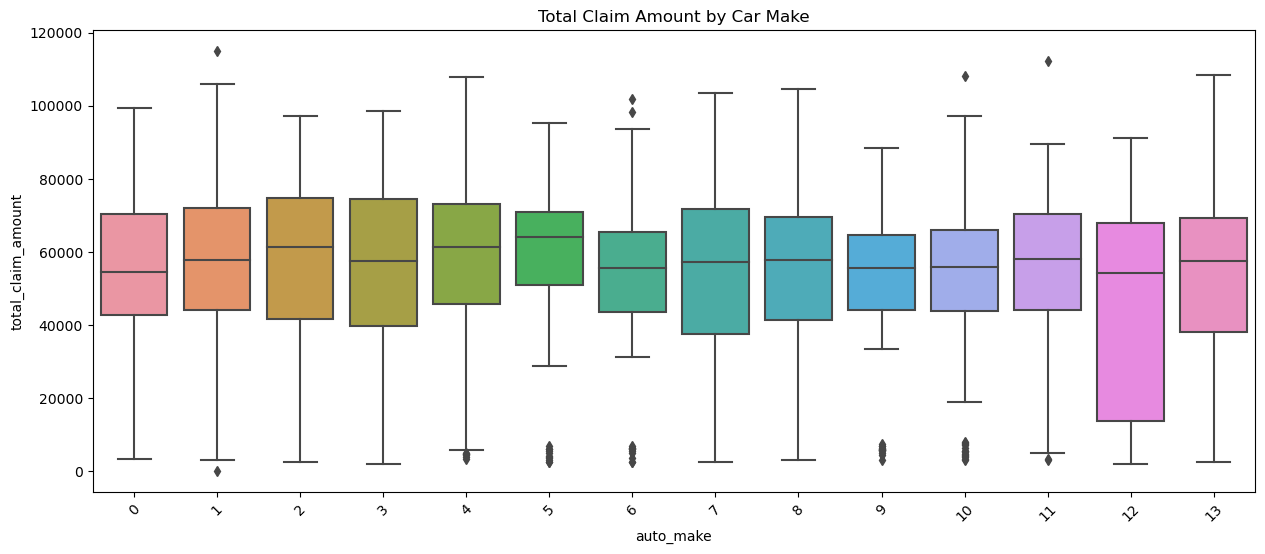

In [81]:
# Claim Amounts by Car Make and Model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_make', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Car Make')
plt.xticks(rotation=45)
plt.show()

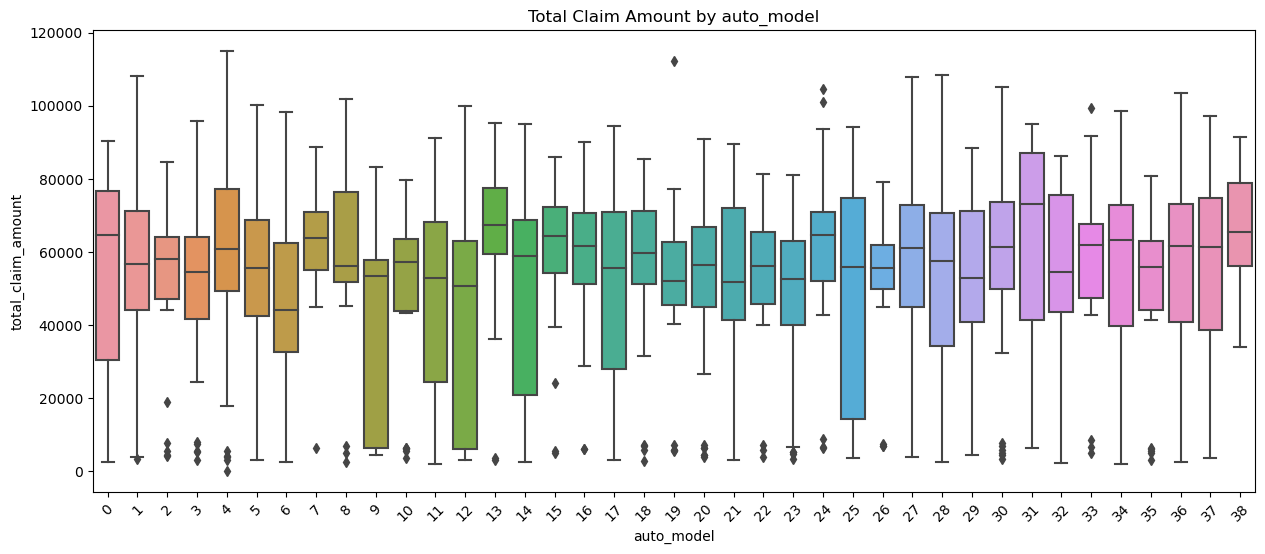

In [82]:
# Claim Amounts by auto_model
plt.figure(figsize=(15, 6))
sns.boxplot(x='auto_model', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by auto_model')
plt.xticks(rotation=45)
plt.show()

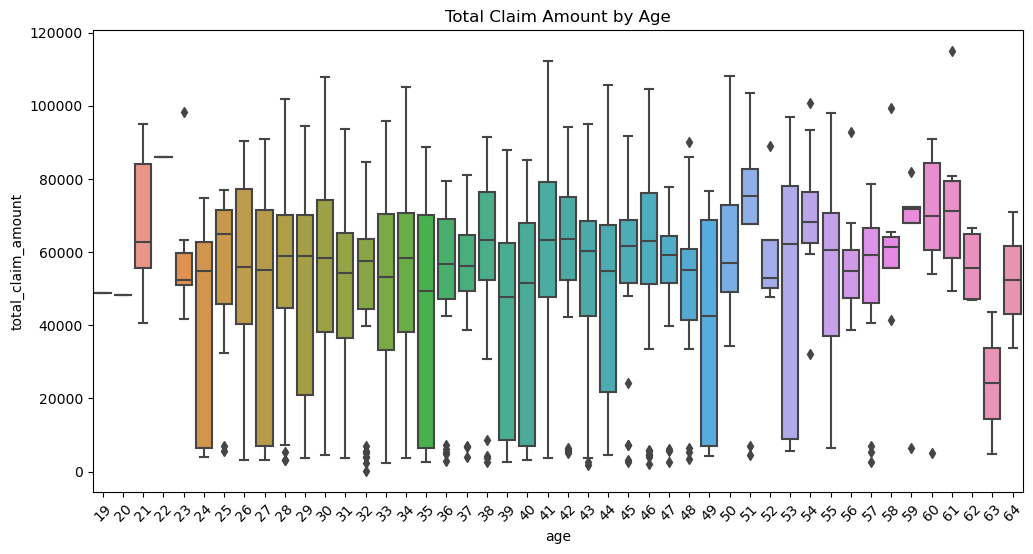

In [33]:
# Distribution of Claim Amounts by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Age')
plt.xticks(rotation=45)
plt.show()

In [34]:
def generate_wordcloud(column_data, title, ax):
    """
    Generate word cloud for a given column data.
    
    Parameters:
    - column_data: Data for which word cloud will be generated.
    - title: Title for the word cloud.
    - ax: Axes object on which word cloud will be plotted.
    """
    # Get word frequencies and keep top 20
    word_freq = column_data.value_counts().to_dict()
    word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:20])
    
    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=16)

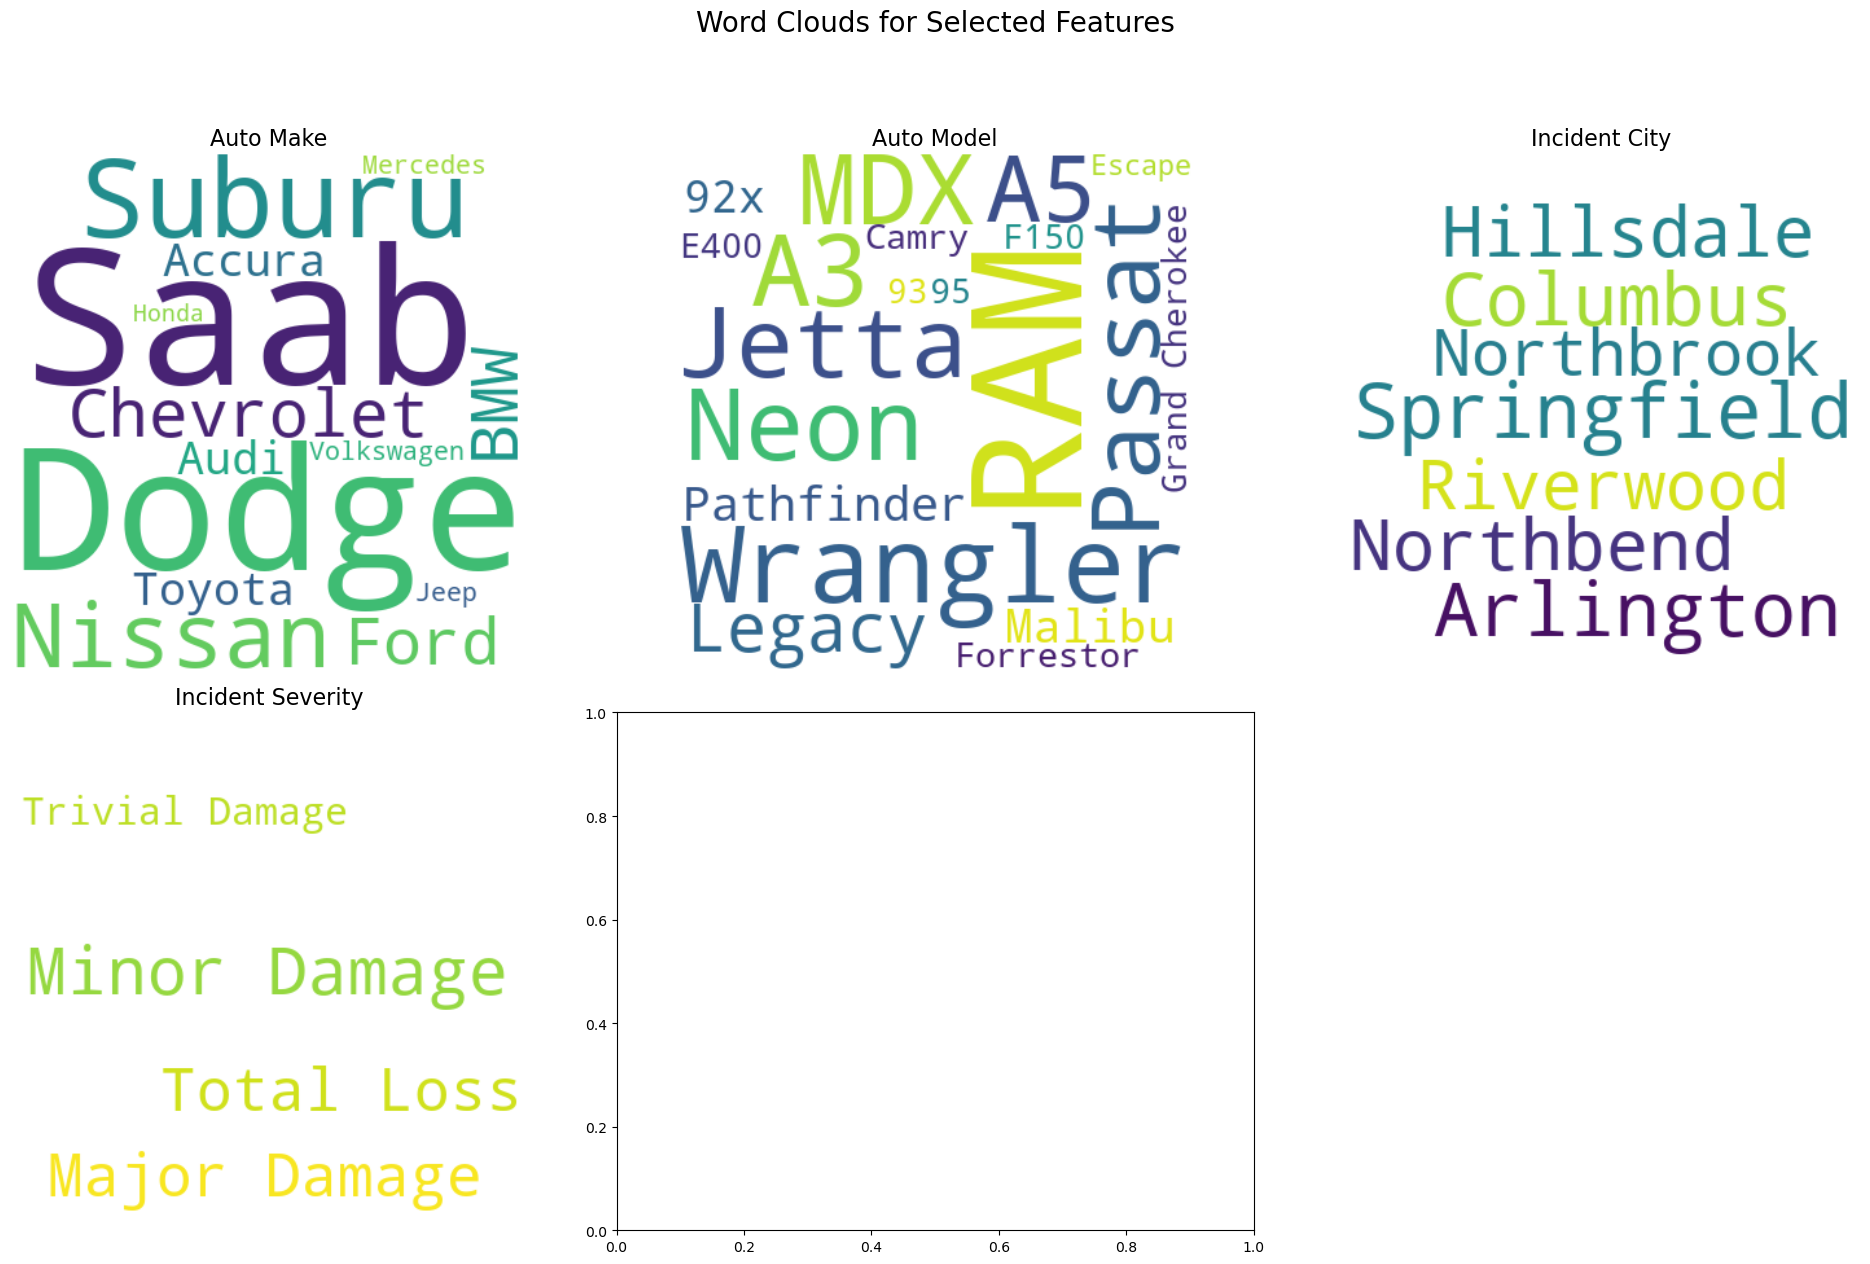

In [35]:
columns_to_viz = ['auto_make', 'auto_model', 'incident_city', 'incident_severity']

# Plotting word clouds
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Word Clouds for Selected Features', fontsize=20, y=1.05)

for i, col in enumerate(columns_to_viz):
    generate_wordcloud(insurance_data[col].dropna(), col.replace('_', ' ').title(), axes[i//3, i%3])

# Remove the last subplot which is extra
fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()


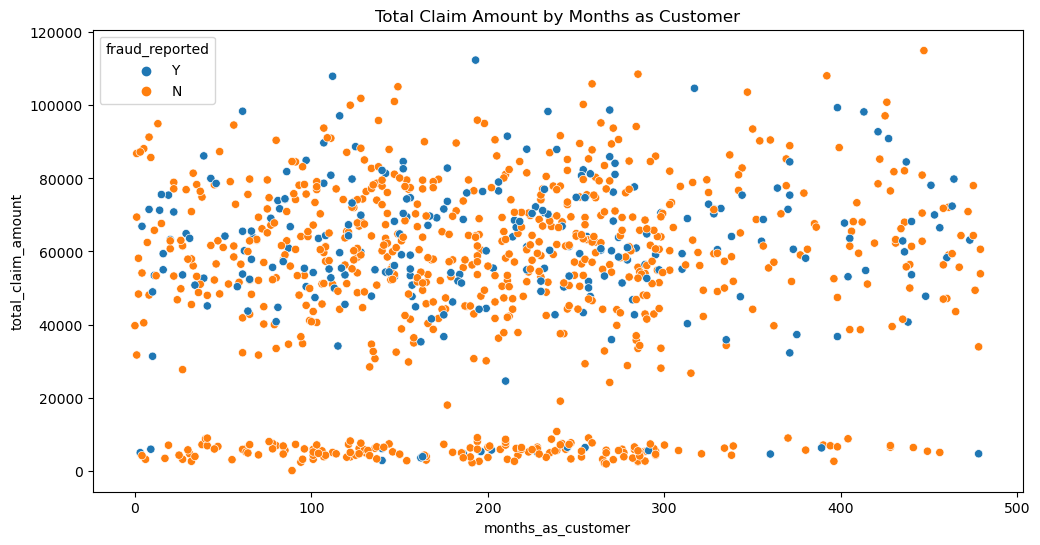

In [36]:
# Claim Amounts by Months as Customer
plt.figure(figsize=(12, 6))
sns.scatterplot(x='months_as_customer', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Months as Customer')
plt.show()

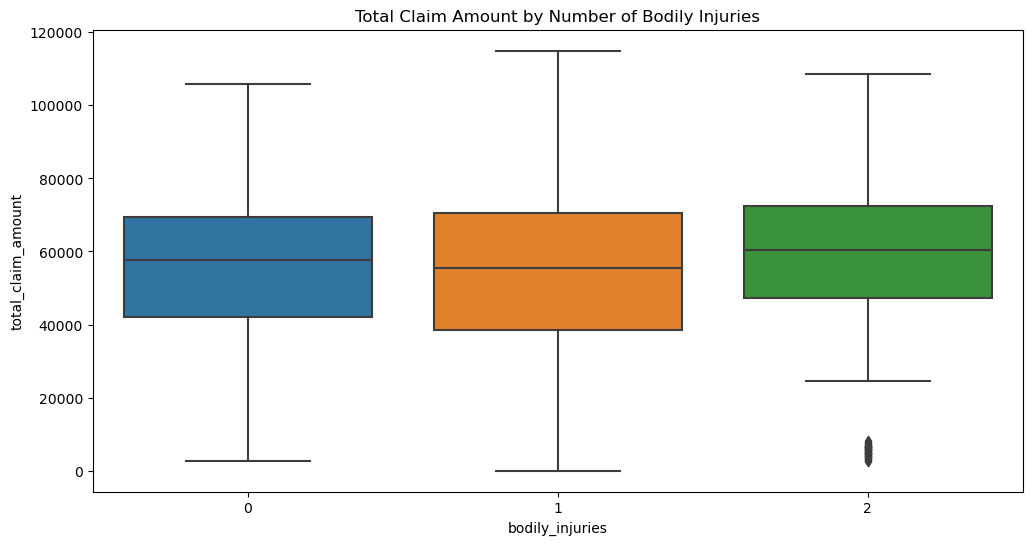

In [37]:
# Claim Amounts by Bodily Injuries
plt.figure(figsize=(12, 6))
sns.boxplot(x='bodily_injuries', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Number of Bodily Injuries')
plt.show()

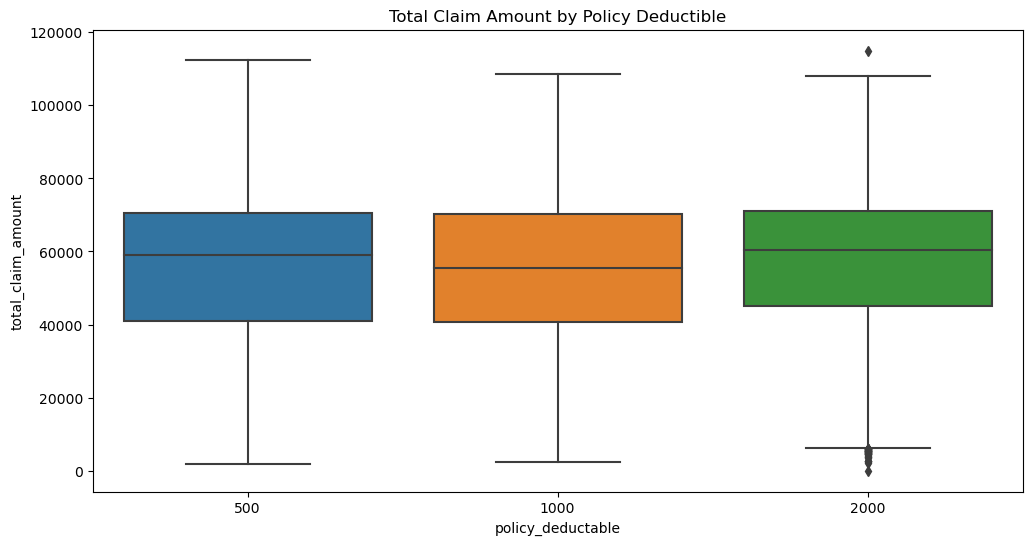

In [38]:
# Claim Amounts by Policy Deductible
plt.figure(figsize=(12, 6))
sns.boxplot(x='policy_deductable', y='total_claim_amount', data=insurance_data)
plt.title('Total Claim Amount by Policy Deductible')
plt.show()

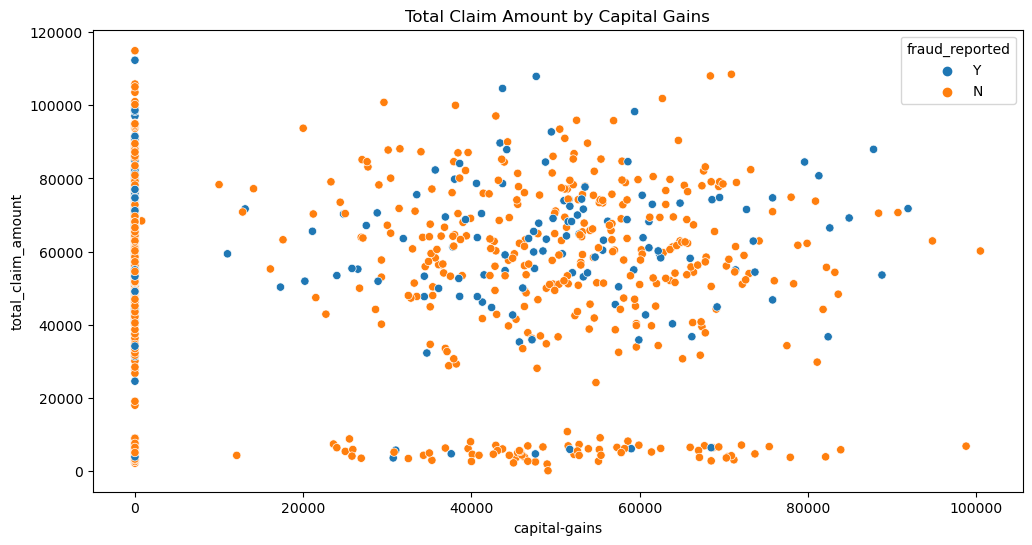

In [39]:
# Claim Amounts by Capital Gains
plt.figure(figsize=(12, 6))
sns.scatterplot(x='capital-gains', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Capital Gains')
plt.show()

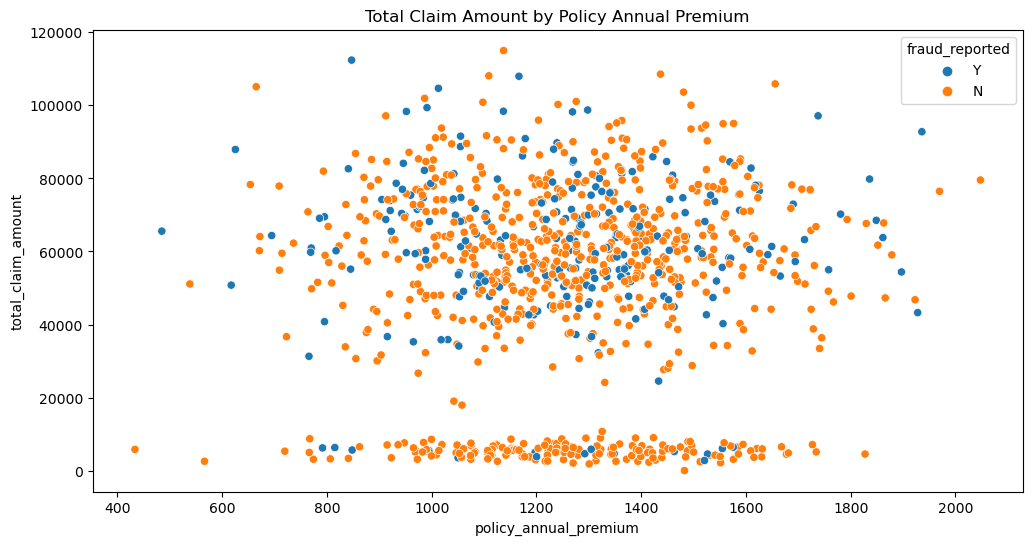

In [40]:
# Claim Amounts by Policy Annual Premium
plt.figure(figsize=(12, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=insurance_data, hue='fraud_reported')
plt.title('Total Claim Amount by Policy Annual Premium')
plt.show()

In [44]:
# Extract categorical variables
categorical_columns = insurance_data.select_dtypes(include=['object']).columns

# Analyze the distribution of each categorical variable
categorical_distributions = {}
for column in categorical_columns:
    categorical_distributions[column] = insurance_data[column].value_counts()

cat_dist_df = pd.DataFrame(categorical_distributions)
cat_dist_df

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
100/300,NaN,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012 5th Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1028 Sky Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1030 Pine Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1087 Flute Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transport-moving,NaN,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unmarried,NaN,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video-games,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wife,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Claims and loss Analysis


<a id="five"></a>

## 5. Modeling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Feature Engineering


In [49]:
def feature_engineering(df):
    """
    Apply feature engineering transformations to the provided dataframe.
    
    Parameters:
    - df: The dataframe to transform.
    
    Returns:
    - Transformed dataframe.
    """
    # Create a copy of the dataframe to avoid modifying the original one
    data = df.copy()
    
    # Convert 'policy_bind_date' and 'incident_date' to datetime
    data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
    data['incident_date'] = pd.to_datetime(data['incident_date'])
    
    # Handling Missing Values
    # Since the column '_c39' has all missing values, we can drop it
    data.drop(columns=['_c39'], inplace=True)
    
    # New columns
    df["Contract Years"] = df["months_as_customer"]/12
    df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']
    df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

    
    # Calculate 'days_since_policy_binding' feature
    data['days_since_policy_binding'] = (data['incident_date'] - data['policy_bind_date']).dt.days
    
    # Extract the month and day from 'policy_bind_date' and 'incident_date'
    data['policy_bind_month'] = data['policy_bind_date'].dt.month
    data['policy_bind_day'] = data['policy_bind_date'].dt.day
    data['incident_month'] = data['incident_date'].dt.month
    data['incident_day'] = data['incident_date'].dt.day
    
    
    # Drop the original 'policy_bind_date' and 'incident_date' columns
    data.drop(['policy_bind_date', 'incident_date'], axis=1, inplace=True)
    
    # Label encoding for columns you specified to retain their word values
    columns_to_encode = ['auto_make', 'auto_model', 'incident_city', 'incident_severity']
    
    for col in columns_to_encode:
        le = LabelEncoder()
        data[col + '_encoded'] = le.fit_transform(data[col])  # New encoded columns
    
    return data

In [50]:
# apply feature engineering function
insurance_data = feature_engineering(insurance_data)

In [51]:
insurance_data.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,fraud_reported,days_since_policy_binding,policy_bind_month,policy_bind_day,incident_month,incident_day,auto_make_encoded,auto_model_encoded,incident_city_encoded,incident_severity_encoded
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,1,100,10,17,1,25,10,1,1,0
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,1,3130,6,27,1,21,8,12,5,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,0,5282,9,6,2,22,4,30,1,1
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,8996,5,25,1,10,3,34,0,0
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,256,6,6,2,17,0,31,0,1


In [52]:
print(insurance_data['auto_make'])

0            Saab
1        Mercedes
2           Dodge
3       Chevrolet
4          Accura
          ...    
995         Honda
996    Volkswagen
997        Suburu
998          Audi
999      Mercedes
Name: auto_make, Length: 1000, dtype: object


In [53]:
# Encode categorical variables
label_encoders = {}
for column in insurance_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    insurance_data[column] = le.fit_transform(insurance_data[column])
    label_encoders[column] = le

In [54]:
# Split the data into training and testing sets
X = insurance_data.drop('fraud_reported', axis=1)
y = insurance_data['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Convert datetime columns to numerical representation
for col in X_train.columns:
    if X_train[col].dtype == 'datetime64[ns]':
        earliest_date = X_train[col].min()
        X_train[col] = (X_train[col] - earliest_date).dt.days
        X_test[col] = (X_test[col] - earliest_date).dt.days

In [56]:
# Scale the numerical variables with a Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [58]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [60]:
# Check important features for exploration
importances = rf_model.feature_importances_

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 77.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       145
           1       0.60      0.53      0.56        55

    accuracy                           0.78       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



In [62]:
features = insurance_data.columns.drop('fraud_reported')
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                         Feature  Importance
44    incident_severity_encoded    0.122595
18            incident_severity    0.113586
12              insured_hobbies    0.061641
8                   insured_zip    0.037681
6         policy_annual_premium    0.032872
31               property_claim    0.031796
36    days_since_policy_binding    0.027833
32                vehicle_claim    0.026754
2                 policy_number    0.026371
0            months_as_customer    0.026360
30                 injury_claim    0.026265
22            incident_location    0.025641
1                           age    0.025140
29           total_claim_amount    0.024337
35                    auto_year    0.021900
40                 incident_day    0.021115
38              policy_bind_day    0.020930
11           insured_occupation    0.019851
42           auto_model_encoded    0.019358
41            auto_make_encoded    0.018714
23     incident_hour_of_the_day    0.018230
37        

### Data Visualization

After the feature engineering process, it's vital to visualize the data to understand its distribution, relationships, and patterns. Visualizations can provide insights that might not be apparent from raw data. Below are various types of plots that help us derive insights from the dataset.


### Interpreting the Visualizations:

1. **Histogram**:

   - **Use**: Understand the distribution of a single variable.
   - **Observations**: Look for peaks (modes), spread, skewness, and outliers. Multiple peaks might indicate multiple groups within data. Skewness indicates the direction of the majority of data points.

2. **Box Plot**:

   - **Use**: Understand spread and central tendency.
   - **Observations**: Observe the median, interquartile range (IQR), whiskers, and outliers. A wide IQR indicates high variability. Outliers may indicate special cases or data entry errors.

3. **Scatter Plot**:

   - **Use**: Understand the relationship between two continuous variables.
   - **Observations**: Look for direction, form, strength, and outliers. A positive direction means as one variable increases, the other does too. Outliers may indicate special cases.

4. **Heatmaps**:

   - **Use**: Visualize matrix-like data or correlations between variables.
   - **Observations**: Darker colors typically represent higher values. In correlation heatmaps, darker cells indicate strong correlations which can be useful for feature selection.

5. **Pie/Donut Chart**:

   - **Use**: Understand the proportion of categories in a categorical variable.
   - **Observations**: Larger slices indicate more common categories.

6. **Violin Plot**:
   - **Use**: Understand distribution of data across categories.
   - **Observations**: Width indicates density. The white dot represents the median of the data.

For each plot, it's crucial to ask: What patterns or anomalies are visible? How can these insights be useful for our goal?


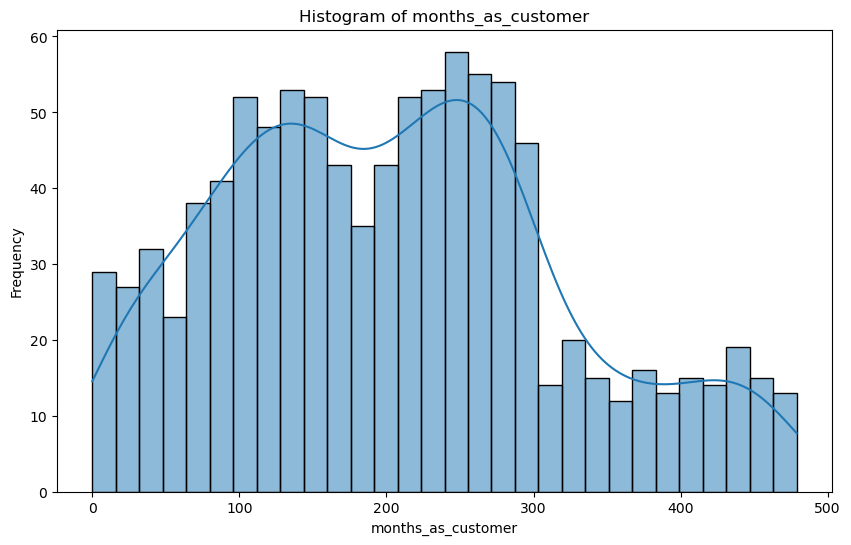

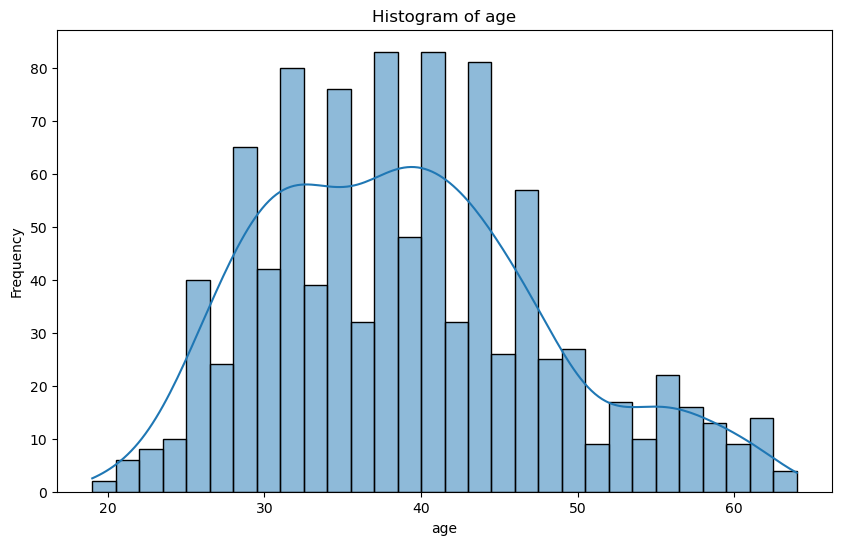

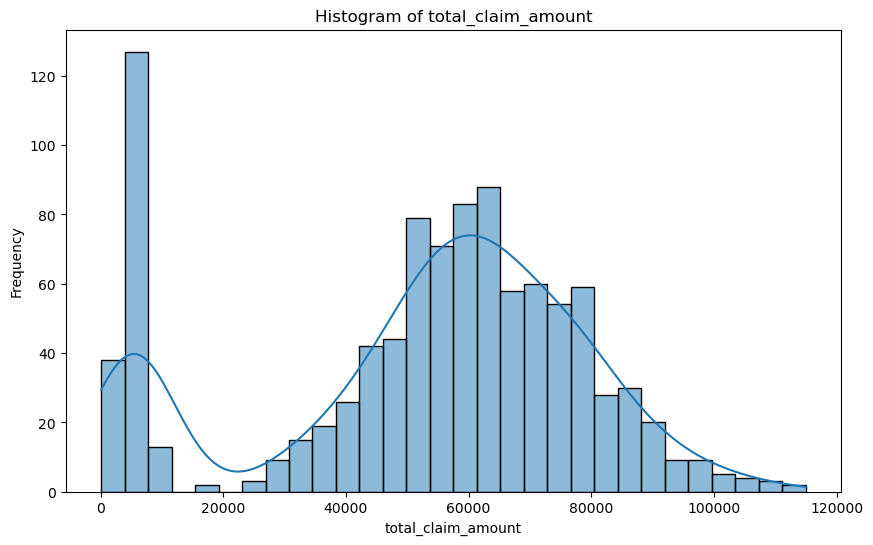

In [63]:
# Histograms for key numerical columns
numerical_columns = ['months_as_customer', 'age', 'total_claim_amount']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(insurance_data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [64]:
# Visualization for missing values
missing_values = insurance_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

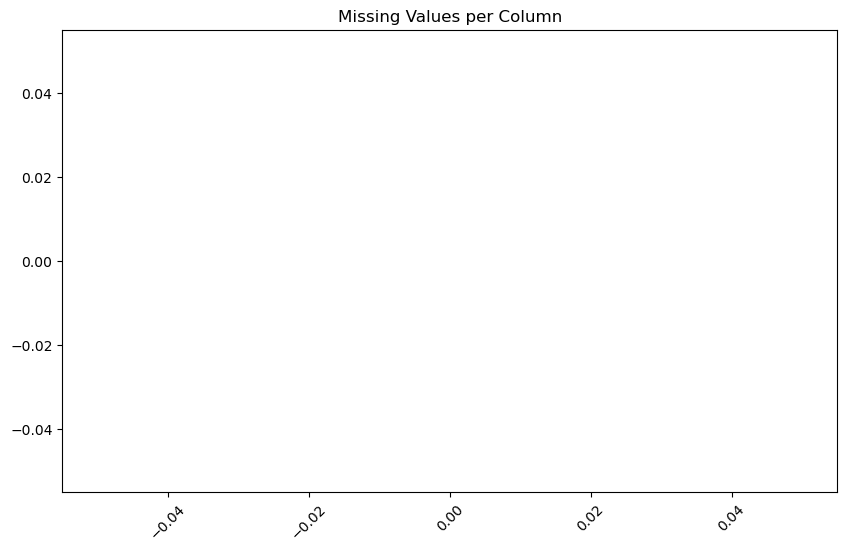

In [65]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.show()

From the bar plot, we can observe that there are no columns with missing values after cleaning the data


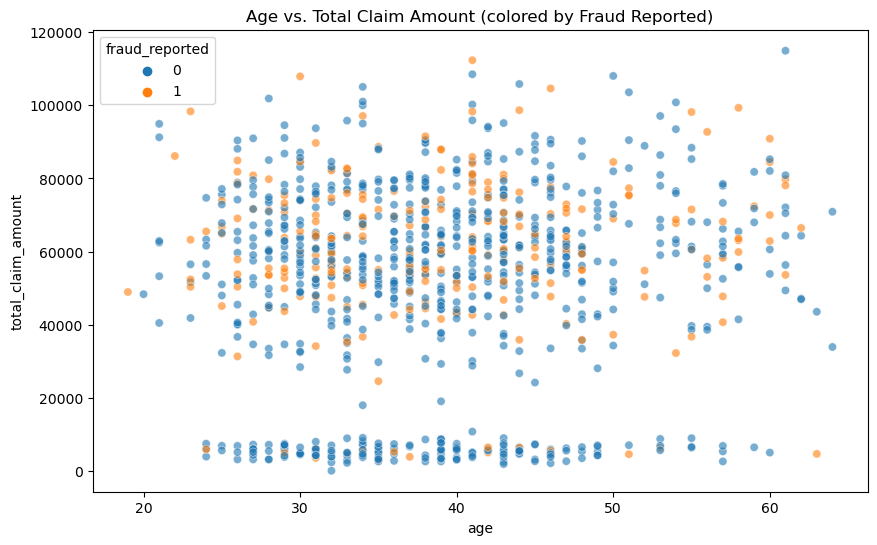

In [67]:
# Bivariate Analysis: Age vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', hue='fraud_reported', data=insurance_data, alpha=0.6)
plt.title('Age vs. Total Claim Amount (colored by Fraud Reported)')
plt.show()

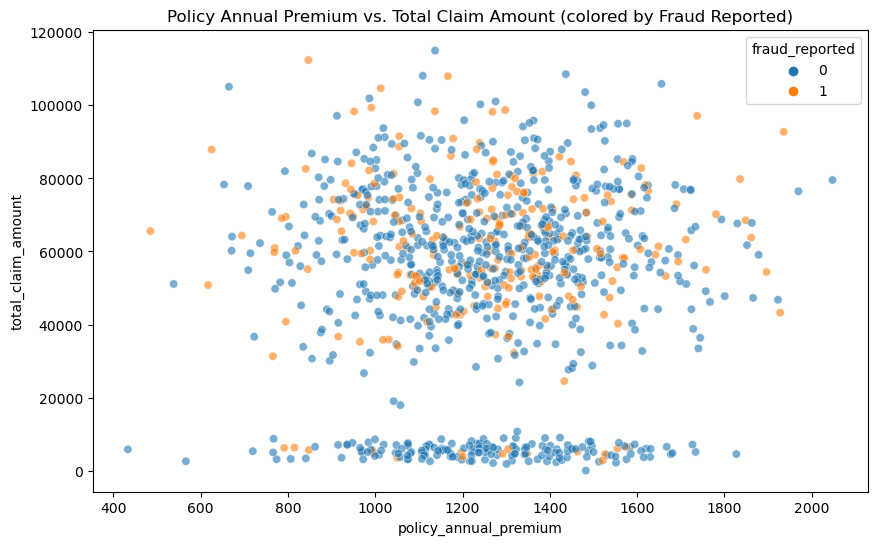

In [68]:
# Bivariate Analysis: Policy Annual Premium vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', hue='fraud_reported', data=insurance_data, alpha=0.6)
plt.title('Policy Annual Premium vs. Total Claim Amount (colored by Fraud Reported)')
plt.show()

From the scatter plots, we can observe relationships between age, policy annual premium, and the total claim amount. The color orange indicates claim was reported as fraudulent while blue is the opposite.


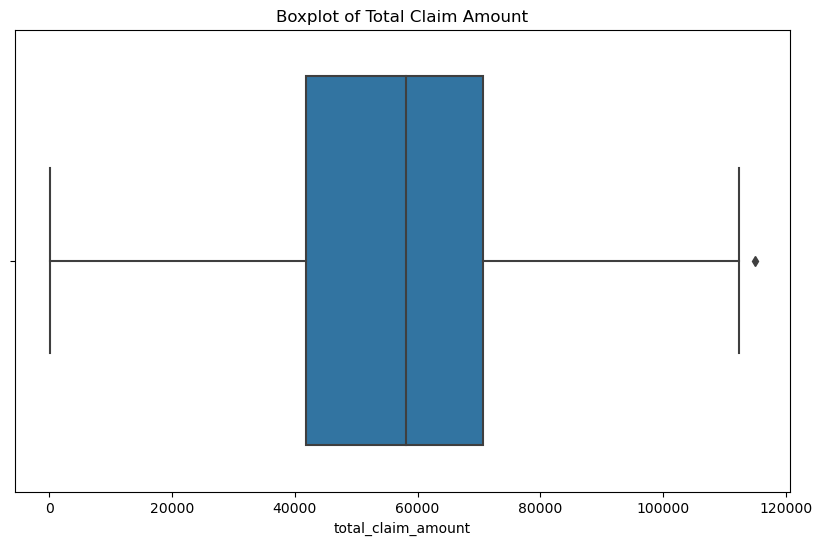

In [69]:
# Boxplot for total_claim_amount to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['total_claim_amount'])
plt.title('Boxplot of Total Claim Amount')
plt.show()

From the boxplot, we can observe potential outliers in the `total_claim_amount` column. Using the IQR method, we've calculated bounds to identify these outliers. The next steps would involve:


### Anomaly Detection in Total Claim Amount

Using the previously calculated IQR bounds, we identify anomalies in the `total_claim_amount` column. Let's examine these anomalies and determine their nature and potential impact.


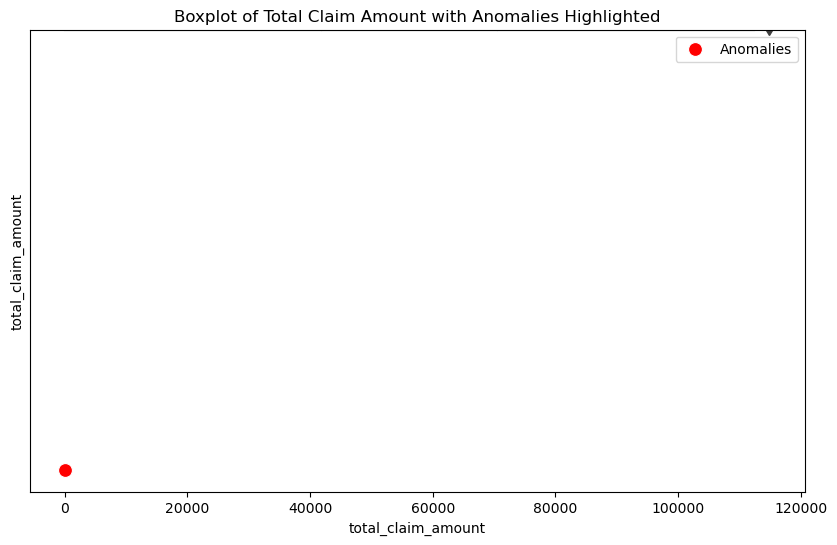

In [70]:
# Visualizing anomalies alongside the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=insurance_data['total_claim_amount'])
sns.scatterplot(x=anomalies.index, y=anomalies['total_claim_amount'], color='red', s=100, label='Anomalies')
plt.title('Boxplot of Total Claim Amount with Anomalies Highlighted')
plt.legend()
plt.show()

The red points in the plot represent the detected anomalies. These could be genuine outliers or valid but extreme cases. It's crucial to determine if these anomalies are errors or represent actual high claim amounts, as this can impact our analysis and modeling. Further investigation, possibly involving domain expertise, might be required to make this determination.


### Categorical Variables Analysis


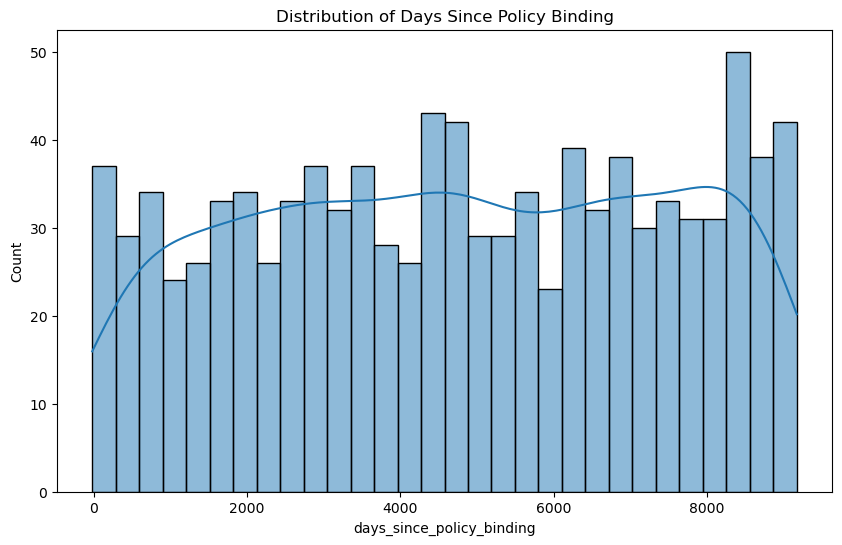

In [71]:
# Distribution of days_since_policy_binding
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data['days_since_policy_binding'], bins=30, kde=True)
plt.title('Distribution of Days Since Policy Binding')
plt.show()

In [73]:
# Relationship with total_claim_amount


In [75]:
# Visualizing correlations with 'loss' using a bar plot


In [76]:
X = insurance_data.drop("variable to be picked", axis=1)
y = insurance_data["variable to be picked"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
logreg = LogisticRegression(max_iter=10000)

In [ ]:
svc = SVC()

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
gboost = GradientBoostingClassifier()

In [ ]:
models = [logreg, svc, dtree, gboost]
model_names = ["Logistic Regression", "SVC", "Decision Tree", "Gradient Boosting"]

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {name}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {svc}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {dtree}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

In [ ]:
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model: {gboost}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("-" * 50)

<a id="six"></a>

## 6. Model Evaluation

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


1. **Logistic Regression**:

   - **Accuracy**: __%
   - **Observation**: 

2. **SVC (Support Vector Classifier)**:

   - **Accuracy**: __%
   - **Observation**: 

3. **Decision Tree**:

   - **Accuracy**: __%
   - **Observation**: The model has a perfect score.

4. **Gradient Boosting**:
   - **Accuracy**: __%
   - **Observation**: 

**Recommendations**:

- **Validation**: 
- **Data Balance**: 

- **Hyperparameter Tuning**: 

- **Feature Importance**: 


### Cross-Validation:


### RandomOverSampler:


### Hyperparameter Tuning for Gradient Boosting:


<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### Random Forest Classifier

**Random Forest** is an ensemble learning method that creates a 'forest' of decision trees during training. When making predictions, it takes the majority vote from all the trees to determine the final output. This approach helps in achieving higher accuracy, as it reduces the risk of overfitting that a single decision tree might have.

- **Training**: The model is trained on the training data by creating multiple decision trees. Each tree is built using a subset of the data and features.
- **Evaluation**: The performance of the Random Forest classifier is evaluated on the test data using accuracy (percentage of correctly predicted instances) and a detailed classification report (which provides precision, recall, and F1-score for each class).

### Logistic Regression

**Logistic Regression** is a statistical model used for binary classification problems. It estimates the probability that a given instance belongs to a particular category.

- **Training**: The model learns the relationship between features and the target variable by adjusting its weights to minimize the difference between predicted probabilities and actual outcomes.
- **Evaluation**: The performance of the logistic regression model is evaluated on the test data using accuracy and a classification report.

### Support Vector Machine (SVM)

**SVM** is a powerful classification method that works by finding the hyperplane that best divides a dataset into classes. It's particularly useful for complex, non-linear relationships.

- **Training**: The SVM searches for the optimal hyperplane that separates the data points of different classes with the maximum margin.
- **Evaluation**: The model's performance is assessed using accuracy and a classification report on the test dataset.

### Gradient Boosting Classifier (using XGBoost)

**Gradient Boosting** is an ensemble learning method that builds multiple weak learners (typically decision trees) in a sequential manner. Each tree corrects the errors of its predecessor. **XGBoost** is an optimized gradient boosting library.

- **Training**: The model is trained iteratively, where each new tree tries to correct the errors made by the previous ones.
- **Evaluation**: The performance of the XGBoost classifier is evaluated on the test data using accuracy and a classification report.


<a id="eight"></a>

## 8. Conclusion

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Through our comprehensive analysis using various machine learning models on the insurance claim dataset, we've garnered several noteworthy insights:


1. **Data Imbalance**: The initial dataset was imbalanced, which could have led to biased results. Using techniques like SMOTE, we equalized the representation of each class, ensuring more reliable model predictions.


2. **Model Performance**:
   - **Random Forest Classifier**: 
   - **Logistic Regression**: 
   - **SVM**: 
   - **Gradient Boosting (XGBoost)**: 

3. **Feature Importance**: Using techniques like Random Forest, we can also gauge the significance of various features. This can guide the insurance company in understanding key factors affecting returns.


4. **Operational Use**: With further tuning and validation, these models can be integrated into the insurance claim processing pipeline, allowing for real-time fraud detection. This can significantly reduce the manual effort required in claim verification and potentially save millions in fraudulent payouts.


5. **Recommendations for Insurance Companies**:
   - **Claim Verification**: 
   - **Customer Profiling**: .
   - **Continuous Model Training**: As fraudsters evolve their tactics, it's crucial for the models to be trained on the latest data. Regularly updating the model will ensure it stays relevant and effective.


6. **Future Work**:



In [ ]:
print(insurance_data.columns)
insurance_data.to_csv("./clean_data.csv")